In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Set maximum number of rows and columns to display
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [2]:
df_merge = pd.read_csv("C:/Users/prath/OneDrive - The University of Texas at Dallas/MSBA/Predictive Analytics for Data Science/Conagra Hackathon/Conagra Project/Data/df_merge.csv")
df_merge.head(3)

,Geography,Time,Product_x,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,Unit Sales Special Pack Only,Unit Sales Feature and Display,Volume Sales,Volume Sales No Merch,Volume Sales Any Merch,Volume Sales Price Reductions Only,Volume Sales Feature Only,Volume Sales Display Only,Volume Sales Special Pack Only,Volume Sales Feature and Display,Dollar Sales,Dollar Sales No Merch,Dollar Sales Any Merch,Dollar Sales Price Reductions Only,Dollar Sales Feature Only,Dollar Sales Display Only,Dollar Sales Special Pack Only,Dollar Sales Feature and Display,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Unit Price Reductions Only,Price per Unit Feature Only,Price per Unit Display Only,Price per Unit Special Pack Only,Price per Unit Feature and Display,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,Price per Volume Price Reductions Only,Price per Volume Feature Only,Price per Volume Display Only,Price per Volume Special Pack Only,Price per Volume Feature and Display,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,ACV Weighted Distribution,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,ACV Weighted Distribution Price Reductions Only,ACV Weighted Distribution Feature Only,ACV Weighted Distribution Display Only,ACV Weighted Distribution Special Pack Only,ACV Weighted Distribution Feature and Display,Product_y,Aisle Name,Category Name,Sub-Category Name,Manufacturer Name,Brand Franchise Name,Brand Name,Package,Total Count,Total Ounces,Form,Flavor / Scent,Meat Source,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info
0,Total US - Multi Outlet + Conv,Week Ending 01-12-20,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,49.378093,49.378093,NaN,NaN,NaN,NaN,NaN,NaN,49.378093,49.378093,NaN,NaN,NaN,NaN,NaN,NaN,419.220014,419.220014,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,49.378093,49.378093,419.220014,NaN,NaN,NaN,0.066628,0.066628,NaN,NaN,NaN,NaN,NaN,NaN,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,AB FOODS LLC,MATCH,MATCH,PLASTIC BAG,1,16.0,GROUND,GROUND BEEF,NaN,MEAT SUBSTITUTE,BEEF,PLANT PROTEIN,VALUE NOT AVAILABLE
1,Total US - Multi Outlet + Conv,Week Ending 01-19-20,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,48.274877,48.274877,NaN,NaN,NaN,NaN,NaN,NaN,48.274877,48.274877,NaN,NaN,NaN,NaN,NaN,NaN,409.853703,409.853703,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,48.274877,48.274877,409.853703,NaN,NaN,NaN,0.060071,0.060071,NaN,NaN,NaN,NaN,NaN,NaN,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,AB FOODS LLC,MATCH,MATCH,PLASTIC BAG,1,16.0,GROUND,GROUND BEEF,NaN,MEAT SUBSTITUTE,BEEF,PLANT PROTEIN,VALUE NOT AVAILABLE
2,Total US - Multi Outlet + Conv,Week Ending 01-26-20,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,60.459866,60.459866,NaN,NaN,NaN,NaN,NaN,NaN,60.459866,60.459866,NaN,NaN,NaN,NaN,NaN,NaN,513.304261,513.304261,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,60.459866,60.459866,513.304261,NaN,NaN,NaN,0.079214,0.079214,NaN,NaN,NaN,NaN,NaN,NaN,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,AB FOODS LLC,MATCH,MATCH,PLASTIC BAG,1,16.0,GROUND,GROUND BEEF,NaN,MEAT SUBSTITUTE,BEEF,PLANT PROTEIN,VALUE NOT AVAILABLE


In [3]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991780 entries, 0 to 991779
Data columns (total 75 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Geography                                        991780 non-null  object 
 1   Time                                             991780 non-null  object 
 2   Product_x                                        991780 non-null  object 
 3   UPC 13 digit                                     991780 non-null  float64
 4   Unit Sales                                       991780 non-null  float64
 5   Unit Sales No Merch                              971731 non-null  float64
 6   Unit Sales Any Merch                             660538 non-null  float64
 7   Unit Sales Price Reductions Only                 623096 non-null  float64
 8   Unit Sales Feature Only                          119887 non-null  float64
 9   Unit Sales Disp

In [4]:
# Convert "Time" column to datetime format
df_merge['Time'] = pd.to_datetime(df_merge['Time'].str.replace('Week Ending ', ''), format='%m-%d-%y')

In [5]:
df_merge['Geography'].unique()

array(['Total US - Multi Outlet + Conv',
       'Great Lakes - Standard - Multi Outlet + Conv',
       'Plains - Standard - Multi Outlet + Conv',
       'West - Standard - Multi Outlet + Conv',
       'California - Standard - Multi Outlet + Conv',
       'Mid-South - Standard - Multi Outlet + Conv',
       'Northeast - Standard - Multi Outlet + Conv',
       'South Central - Standard - Multi Outlet + Conv',
       'Southeast - Standard - Multi Outlet + Conv'], dtype=object)

In [6]:
# Removing all the records where Geography is 'Total US - Multi Outlet + Conv'
df_merge = df_merge[df_merge['Geography'] != 'Total US - Multi Outlet + Conv']

In [7]:
# Reducing Region Categories

region_mapping = {
    'Great Lakes - Standard - Multi Outlet + Conv': 'East US',
    'Northeast - Standard - Multi Outlet + Conv': 'East US',
    'Mid-South - Standard - Multi Outlet + Conv': 'East US',
    'Southeast - Standard - Multi Outlet + Conv': 'East US',
    'West - Standard - Multi Outlet + Conv': 'West US',
    'California - Standard - Multi Outlet + Conv': 'West US',
    'Plains - Standard - Multi Outlet + Conv': 'Central US',
    'South Central - Standard - Multi Outlet + Conv': 'Central US'
}

df_merge['Region'] = df_merge['Geography'].replace(region_mapping)

# Drop the 'Geography' column
df_merge.drop(columns=['Geography'], inplace=True)

# Insert the 'Region' column to the first position
df_merge.insert(0, 'Region', df_merge.pop('Region'))

In [8]:
# Step 1: Calculate total unit sales for each brand franchise
brand_sales = df_merge.groupby('Brand Franchise Name')['Unit Sales'].sum().reset_index()

# Step 2: Identify the top 5 brands by unit sales
top_brands = brand_sales.nlargest(5, 'Unit Sales')['Brand Franchise Name']

# Step 3: Create a new column to categorize brands
df_merge['Brand Category'] = np.where(df_merge['Brand Franchise Name'] == 'GARDEIN', 'GARDEIN',
                                      np.where(df_merge['Brand Franchise Name'].isin(top_brands), 'LEADERS', 'OTHERS'))

# Display the updated DataFrame
df_merge.head()

,Region,Time,Product_x,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,Unit Sales Special Pack Only,Unit Sales Feature and Display,Volume Sales,Volume Sales No Merch,Volume Sales Any Merch,Volume Sales Price Reductions Only,Volume Sales Feature Only,Volume Sales Display Only,Volume Sales Special Pack Only,Volume Sales Feature and Display,Dollar Sales,Dollar Sales No Merch,Dollar Sales Any Merch,Dollar Sales Price Reductions Only,Dollar Sales Feature Only,Dollar Sales Display Only,Dollar Sales Special Pack Only,Dollar Sales Feature and Display,Price per Unit,Price per Unit No Merch,Price per Unit Any Merch,Price per Unit Price Reductions Only,Price per Unit Feature Only,Price per Unit Display Only,Price per Unit Special Pack Only,Price per Unit Feature and Display,Price per Volume,Price per Volume No Merch,Price per Volume Any Merch,Price per Volume Price Reductions Only,Price per Volume Feature Only,Price per Volume Display Only,Price per Volume Special Pack Only,Price per Volume Feature and Display,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,ACV Weighted Distribution,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,ACV Weighted Distribution Price Reductions Only,ACV Weighted Distribution Feature Only,ACV Weighted Distribution Display Only,ACV Weighted Distribution Special Pack Only,ACV Weighted Distribution Feature and Display,Product_y,Aisle Name,Category Name,Sub-Category Name,Manufacturer Name,Brand Franchise Name,Brand Name,Package,Total Count,Total Ounces,Form,Flavor / Scent,Meat Source,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info,Brand Category
52,East US,2020-01-12,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,5.485130,5.485130,NaN,NaN,NaN,NaN,NaN,NaN,5.485130,5.485130,NaN,NaN,NaN,NaN,NaN,NaN,46.568753,46.568753,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,5.485130,5.485130,46.568753,NaN,NaN,NaN,0.057531,0.057531,NaN,NaN,NaN,NaN,NaN,NaN,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,AB FOODS LLC,MATCH,MATCH,PLASTIC BAG,1,16.0,GROUND,GROUND BEEF,NaN,MEAT SUBSTITUTE,BEEF,PLANT PROTEIN,VALUE NOT AVAILABLE,OTHERS
53,East US,2020-01-19,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,12.071169,12.071169,NaN,NaN,NaN,NaN,NaN,NaN,12.071169,12.071169,NaN,NaN,NaN,NaN,NaN,NaN,102.484222,102.484222,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,12.071169,12.071169,102.484222,NaN,NaN,NaN,0.057223,0.057223,NaN,NaN,NaN,NaN,NaN,NaN,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,AB FOODS LLC,MATCH,MATCH,PLASTIC BAG,1,16.0,GROUND,GROUND BEEF,NaN,MEAT SUBSTITUTE,BEEF,PLANT PROTEIN,VALUE NOT AVAILABLE,OTHERS
54,East US,2020-01-26,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,4.389804,4.389804,NaN,NaN,NaN,NaN,NaN,NaN,4.389804,4.389804,NaN,NaN,NaN,NaN,NaN,NaN,37.269435,37.269435,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,4.389804,4.389804,37.269435,NaN,NaN,NaN,0.057074,0.057074,NaN,NaN,NaN,NaN,NaN,NaN,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,SUBSTITUTE MEAT/POULTRY/SEAFOOD - FZ/RFG,FZ MEAT SUBSTITUTES,AB FOODS LLC,MATCH,MATCH,PLASTIC BAG,1,16.0,GROUND,GROUND BEEF,NaN,MEAT SUBSTITUTE,BEEF,PLANT PROTEIN,VALUE NOT AVAILABLE,OTHERS
55,East US,2020-02-02,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,18.658282,18.658282,NaN,NaN,NaN,NaN,NaN,NaN,18.658282,18.658282,NaN,NaN,NaN,NaN,NaN,NaN,158.408811,158.408811,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,18.658

In [9]:
df_merge['Brand Category'].unique()

array(['OTHERS', 'LEADERS', 'GARDEIN'], dtype=object)

In [10]:
# Check if the values in 'Product_x' and 'Product_y' columns are the same
same_values_mask = df_merge['Product_x'] == df_merge['Product_y']
same_values_mask

# Drop the 'Product_y' column if the values are the same
if same_values_mask.all():
    df_merge.drop(columns=['Product_y'], inplace=True)

In [11]:
# Define the list of columns to drop
columns_to_drop = ['Brand Name', 'Manufacturer Name', 'Meat Source', 'Category Name', 'Aisle Name',
                   'Unit Sales Any Merch', 'Volume Sales Any Merch', 'Dollar Sales Any Merch', 
                   'Price per Unit Any Merch', 'Price per Volume Any Merch', 
                   'ACV Weighted Distribution Any Merch', 'Unit Sales Special Pack Only',
                   'Volume Sales Special Pack Only', 'Dollar Sales Special Pack Only', 
                   'Price per Unit Special Pack Only', 'Price per Volume Special Pack Only', 
                   'ACV Weighted Distribution Special Pack Only', 'Base Unit Sales',
                   'Base Volume Sales', 'Base Dollar Sales']

# Create a new DataFrame with the simplified dataset
df_merge1 = df_merge.drop(columns=columns_to_drop)

# Display the first few rows of the new DataFrame
print(df_merge1.shape)
df_merge1.head(3)

(824367, 55)


,Region,Time,Product_x,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,Unit Sales Feature and Display,Volume Sales,Volume Sales No Merch,Volume Sales Price Reductions Only,Volume Sales Feature Only,Volume Sales Display Only,Volume Sales Feature and Display,Dollar Sales,Dollar Sales No Merch,Dollar Sales Price Reductions Only,Dollar Sales Feature Only,Dollar Sales Display Only,Dollar Sales Feature and Display,Price per Unit,Price per Unit No Merch,Price per Unit Price Reductions Only,Price per Unit Feature Only,Price per Unit Display Only,Price per Unit Feature and Display,Price per Volume,Price per Volume No Merch,Price per Volume Price Reductions Only,Price per Volume Feature Only,Price per Volume Display Only,Price per Volume Feature and Display,Incremental Units,Incremental Volume,Incremental Dollars,ACV Weighted Distribution,ACV Weighted Distribution No Merch,ACV Weighted Distribution Price Reductions Only,ACV Weighted Distribution Feature Only,ACV Weighted Distribution Display Only,ACV Weighted Distribution Feature and Display,Sub-Category Name,Brand Franchise Name,Package,Total Count,Total Ounces,Form,Flavor / Scent,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info,Brand Category
52,East US,2020-01-12,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,5.485130,5.485130,NaN,NaN,NaN,NaN,5.485130,5.485130,NaN,NaN,NaN,NaN,46.568753,46.568753,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057531,0.057531,NaN,NaN,NaN,NaN,FZ MEAT SUBSTITUTES,MATCH,PLASTIC BAG,1,16.0,GROUND,GROUND BEEF,MEAT SUBSTITUTE,BEEF,PLANT PROTEIN,VALUE NOT AVAILABLE,OTHERS
53,East US,2020-01-19,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,12.071169,12.071169,NaN,NaN,NaN,NaN,12.071169,12.071169,NaN,NaN,NaN,NaN,102.484222,102.484222,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057223,0.057223,NaN,NaN,NaN,NaN,FZ MEAT SUBSTITUTES,MATCH,PLASTIC BAG,1,16.0,GROUND,GROUND BEEF,MEAT SUBSTITUTE,BEEF,PLANT PROTEIN,VALUE NOT AVAILABLE,OTHERS
54,East US,2020-01-26,MATCH FROZEN GROUND BEEF MEAT SUBSTITUTE GROUN...,8.868440e+11,4.389804,4.389804,NaN,NaN,NaN,NaN,4.389804,4.389804,NaN,NaN,NaN,NaN,37.269435,37.269435,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,8.49,8.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057074,0.057074,NaN,NaN,NaN,NaN,FZ MEAT SUBSTITUTES,MATCH,PLASTIC BAG,1,16.0,GROUND,GROUND BEEF,MEAT SUBSTITUTE,BEEF,PLANT PROTEIN,VALUE NOT AVAILABLE,OTHERS


In [12]:
df_merge1['Unit Sales'].describe()

count    824367.000000
mean       1147.889225
std        2886.256530
min           0.010000
25%          29.274151
50%         185.652981
75%         935.919290
max      266635.199160
Name: Unit Sales, dtype: float64

In [13]:
# Summary statistics for all columns (numeric and categorical)
summary_stats_all = df_merge1.describe(include='all')

# Display summary statistics
print("Summary Statistics for All Columns:")
print(summary_stats_all)

Summary Statistics for All Columns:
         Region                 Time  \
count    824367               824367   
unique        3                  211   
top     East US  2022-11-06 00:00:00   
freq     449771                 4346   
first       NaN  2020-01-12 00:00:00   
last        NaN  2024-01-21 00:00:00   
mean        NaN                  NaN   
std         NaN                  NaN   
min         NaN                  NaN   
25%         NaN                  NaN   
50%         NaN                  NaN   
75%         NaN                  NaN   
max         NaN                  NaN   

                                                Product_x  UPC 13 digit  \
count                                              824367  8.243670e+05   
unique                                               1364           NaN   
top     GARDEIN FROZEN CHICKEN POULTRY SUBSTITUTE STRI...           NaN   
freq                                                 1688           NaN   
first                       

## Plotting unit sales v/s all categorical variables one by one
* Here we will also do some data manipulation to reduce the number of categories in each variable

In [14]:
# Reducing the categories for 'Package' variable

category_mapping = {
    'PLASTIC BAG': 'Plastic Bag',
    'VACUUM PACKED': 'Vacuum Packed',
    'BOX': 'Box',
    'RESEALABLE PLASTIC BAG': 'Plastic Bag',
    'INDIVIDUALLY WRAPPED IN BOX': 'Box',
    'PEGGED PLASTIC WRAP TRAY': 'Plastic Container',
    'PLASTIC CONTAINER IN SLEEVE': 'Plastic Container',
    'RESEALABLE PLASTIC PEG BAG': 'Plastic Bag',
    'CARDBOARD BOX & WINDOW': 'Box',
    'PLASTIC CONTAINER': 'Plastic Container',
    'PLASTIC WRAPPED': 'Plastic Container',
    'PLASTIC BAG IN BOX': 'Plastic Bag',
    'INDIVIDUAL POUCH IN RESEALABLE PLASTIC BAG': 'Plastic Bag',
    'CARDBOARD BOX': 'Box',
    'PLASTIC WRAP TRAY': 'Plastic Container',
    'VACUUM PACKED IN SLEEVE': 'Vacuum Packed',
    'PLASTIC WRAPPED IN CARDBOARD SLEEVE': 'Plastic Container',
    'VACUUM PACKAGED PLASTIC': 'Vacuum Packed',
    'PLASTIC TRAY IN CARDBOARD SLEEVE': 'Plastic Container',
    'PLASTIC WRAP IN BOX': 'Plastic Bag',
    'PLASTIC TUB': 'Plastic Container',
    'MICROWAVEABLE SAFE STAND UP POUCH': 'Plastic Bag',
    'CARTON': 'Box',
    'PLASTIC TRAY IN SLEEVE': 'Plastic Container',
    'BAG IN BOX': 'Plastic Bag',
    'PLASTIC PEG BAG': 'Plastic Bag',
    'PAPER WRAPPED': 'Other',
    'RESEALABLE STAND UP BAG': 'Plastic Bag',
    'PEG BAG & WINDOW': 'Plastic Bag',
    'CARDBOARD SLEEVE & VACUUM PACKED': 'Vacuum Packed'
}

# Map categories in DataFrame
df_merge1['Package'] = df_merge1['Package'].map(category_mapping)

# Display unique values in the simplified category
print()
print(df_merge1['Package'].unique())


['Plastic Bag' 'Vacuum Packed' 'Box' 'Plastic Container' 'Other']


In [15]:
# Reducing categories for 'Form' variable

form_mapping = {
    'GROUND': 'Ground', 'BALL': 'Other', 'BURGER PATTY': 'Patty/Burger', 'CRUMBLE': 'Other', 'PATTY': 'Patty/Burger',
    'BURGER': 'Patty/Burger', 'LINK': 'Link/Sausage', 'MEATBALL': 'Other', 'PIECE': 'Other', 'SLICED': 'Other',
    'STEAK': 'Steak/Strip', 'SPARE RIBS': 'Other', 'CHUNK': 'Other', 'TIP': 'Other', 'SLICE': 'Other',
    'BREAKFAST PATTY': 'Patty/Burger', 'FILET': 'Steak/Strip', 'SLIDER': 'Patty/Burger', 'CAKE': 'Other', 'STRIP': 'Steak/Strip',
    'BITE': 'Other', 'POPPER': 'Other', 'BREAKFAST SAUSAGE PATTY': 'Patty/Burger', 'HOT DOG': 'Link/Sausage',
    'PULLED': 'Other', 'BREAKFAST LINK': 'Link/Sausage', 'FRANK': 'Link/Sausage', 'ROAST': 'Other', 'WHOLE': 'Other',
    'STICK': 'Other', 'NOT STATED ON PACKAGE': 'Other', 'BLOCK': 'Other', 'ROLL': 'Other', 'NUGGET': 'Other',
    'BREAST': 'Other', 'FINGER': 'Other', 'TENDER': 'Other', 'WING': 'Other', 'CUTLET': 'Other', 'DICED': 'Other', 'POPCORN': 'Other',
    'DIPPER': 'Other', 'BREAKFAST BITES': 'Other', 'CHUB': 'Other', 'DINNER SAUSAGE LINK': 'Link/Sausage',
    'CUBE': 'Other', 'BAR': 'Other', 'LOAF': 'Other', 'MEAT LOAF': 'Other', 'BRATWURST': 'Link/Sausage',
    'BREAKFAST SAUSAGE ROLL': 'Link/Sausage', 'SPLIT ROPE': 'Link/Sausage', 'ROPE': 'Link/Sausage',
    'ULTRA THIN SLICE': 'Other', 'DELI SLICED': 'Other', 'CUT': 'Other', 'BREAKFAST SAUSAGE LINK': 'Link/Sausage',
    'GIZZARD': 'Other', 'RIBLET': 'Other', 'SAUSAGE': 'Link/Sausage', 'DINNER LINK': 'Link/Sausage',
    'DRUMSTICK': 'Other', 'FUN NUGGETS': 'Other', 'SHREDS': 'Other', 'SHREDDED': 'Other', 'FRIES': 'Other',
    'TENDERS': 'Other', 'BINGS': 'Other', 'SAUSAGE PATTY': 'Patty/Burger', 'BAO BUN': 'Other'
}

# Replace old categories with new ones
df_merge1['Form'] = df_merge1['Form'].replace(form_mapping)

# Display unique values in the simplified category
print()
print(df_merge1['Form'].unique())


['Ground' 'Other' 'Patty/Burger' 'Link/Sausage' 'Steak/Strip']


In [16]:
# Reducing categories for 'Flavour / Scent' variable

flavor_categories = {
    'Meat-Based Flavors': ['GROUND BEEF', 'ITALIAN SAUSAGE', 'ORIGINAL BEEFY', 'REGULAR',
                           'SAUSAGE', 'SALAMI', 'BEEF', 'PEPPER STEAK', 'MAPLE SAUSAGE',
                           'CHORIZO', 'BACON', 'BREAKFAST SAUSAGE', 'HAM STYLE ROAST',
                           'CHICKEN', 'CHICKEN SCALOPPINI', 'NASHVILLE HOT',
                           'BARBEQUE CHICKEN', 'ORIGINAL TURKEY', 'SPICY CHICKEN',
                           'ROASTED TURKEY', 'SMOKED HAM', 'CHICKEN APPLE SAUSAGE',
                           'ORIGINAL BRAT', 'OVEN ROASTED TURKEY', 'CORNED BEEF',
                           'LEMON HERB', 'FISH', 'SPINACH CHICKEN', 'NASHVILLE HOT CHICKEN',
                           'KOREAN BARBEQUE', 'BUFFALO STYLE CAULIFLOWER', 'SMOKY SAUSAGE',
                           'SPICY HABANERO CHICKEN'],
    'Vegetable-Based Flavors': ['BLACK BEAN', 'CALIFORNIA VEGETABLE', 'GARDEN VEGETABLE',
                                 'SUMMER HARVEST', 'ALL AMERICAN VEGETABLE', 'HEIRLOOM BEAN',
                                 'KALE', 'ASIAN', 'BOMBAY CURRY', 'CALIFORNIA', 'MUSHROOM RISOTTO',
                                 'SUNDAY FUNDAY', 'SUPER GREENS', 'SWEET HEAT BEET', 'TEX MEX',
                                 'SUPER CAULIFLOWER', 'BLACK RICE', 'ROOT VEGETABLE',
                                 'SAVORY MUSHROOM', 'HARVEST BLEND', 'SWEET POTATO SUNFLOWER',
                                 'BROWN RICE & GARBANZO & WHITE BEAN', 'INDIAN SPICED MASALA',
                                 'BLACK BEAN CHIPOTLE', 'PORTABELLO', 'VEGETABLE', 'VEGETABLE LOVERS',
                                 'VEGETABLE MEAT LOVER', 'VEGETABLE PORK', 'WHITE BEAN CHILI',
                                 'VEGETABLE GRILLER ORIGINAL', 'VEGETABLE GRILLER PRIME',
                                 'MULTI VEGETABLE', 'HAZELNUT CRANBERRY', 'WALNUT',
                                 'SPICY GREEN CHILI', 'SPICY THAI', 'ZESTY ITALIAN', 'FRENCH HERB',
                                 'TANDOORI SPICE', 'THAI COCONUT', 'LENTIL', 'SPICY MUSHROOM',
                                 'SPINACH', 'PEPPADEW', 'POBLANO BLACK BEAN', 'ROASTED BEET & KALE',
                                 'SMOKY & SPICY', 'SPICY CHIPOTLE BLACK BEAN', 'SWEET & SPICY PEPPER',
                                 'SWEET PEPPER', 'SWEET POTATO & VEGETABLE', 'TUSCAN KALE WHITE BEAN',
                                 'APPLEWOOD SMOKE', 'APPLE SAUSAGE', 'MEXICAN', 'KIMCHI', 'ARTICHOKE',
                                 'PEAS & CARROT', 'BUTTERMILK', 'CHICAGO ITALIAN', 'MUSHROOM MISO',
                                 'SEA SALT & PEPPER', 'BLACK BEAN & PLANTAIN', 'SOUTHWEST ADZUKI BEAN',
                                 'PINEAPPLE CHIPOTLE', 'PEPPADEW PEPPER', 'ITALIAN GARLIC & FENNEL',
                                 'BLACK BEAN QUINOA', 'GREEN & BEAN MEDLEY', 'JALAPENO',
                                 'CRACKED BLACK PEPPER', 'GENERAL TSOS', 'GREEK',
                                 'KOREAN STYLE BARBEQUE', 'JALAPENO & CILANTRO', 'MANGO & BASIL',
                                 'MUSHROOM & WINE', 'WHITE TRUFFLE & BLACK BEAN', 'MOROCCAN',
                                 'MUSHROOM QUINOA', 'MANGO CHIPOTLE', 'CHICK PEAS & CURRY',
                                 'TOMATO & SPINACH'],
    'Other Flavors': ['MASALA', 'EGGPLANT', 'CHIPOTLE', 'SWEET & SAVORY',
                      'SWEET & SRIGINAL', 'SWEET & TANGY', 'WILD MUSHROOM CAULIFLOWER HEMPSEED',
                      'HICKORY & SAGE', 'SWEET APPLE', 'SANTA FE', 'SMOKEY SAVORY MAPLE',
                      'TERIYAKI', 'MADRAS CURRY', 'MAMA MIA SPICY ITALIAN',
                      'SAVORY MUSHROOM & ROASTED GARLIC', 'SUN DRIED TOMATO & SPINACH',
                      'BAJA', 'GREEN CHILE & PINTO BEAN', 'SAUCY BUFFALO',
                      'SPICY ITALIAN', 'ASIAN VEGETABLE', 'BARBEQUE',
                      'BLACK BEAN & VEGETABLE', 'CALIFORNIA BURGER', 'CHAR GRILLED',
                      'CHEDDAR', 'CHICK PEAS SWEET POTATO', 'FLAME GRILLED',
                      'GARDEN BROILER', 'HERB & SPICE', 'KALE & QUINOA', 'LENTIL BARLEY',
                      'MUSHROOM & CHEESE', 'PEPPADEW', 'PINTO HABANERO',
                      'POBLANO BLACK BEAN', 'QUINOA CRUNCH', 'QUINOA',
                      'ROASTED BEET & KALE', 'SMOKY & SPICY',
                      'SPICY CHIPOTLE BLACK BEAN', 'SWEET & SPICY PEPPER',
                      'SWEET PEPPER', 'SWEET POTATO & VEGETABLE', 'THAI',
                      'TUSCAN KALE WHITE BEAN', 'PEPPER SEASONING', 'WALNUT & CHEESE',
                      'BEETROOT & BEAN', 'PUMPKIN & SPINACH', 'EXTREME',
                      'GREEK MOUSSAKA', 'LEMON DILL SALMON', 'MUSHROOM RICE',
                      'PORTABELLO QUINOA', 'SPROUTED QUNIOA CHIA', 'SUNFLOWER BEET',
                      'CHICK PEAS & TAHINI', 'GARDEN HERB', 'SHIITAKE MUSHROOM',
                      'SOUTH WEST', 'ALL AMERICAN', 'CURRIED SWEET POTATO', 'HEMPSEED',
                      'SPICY ITALIAN HEMPSEED', 'WILD MUSHROOM CAULIFLOWER HEMPSEED',
                      'BUFFALO', 'HAM STYLE ROAST', 'GARDEN VARIETY',
                      'PORTABELLO MUSHROOM & CHEESE', 'BLACK PEPPER',
                      'HERBY GARLIC GREENS', 'SOUTHWEST STYLE BEET',
                      'SWEET CURRY CARROT', 'FALAFEL & SESAME', 'SPICY FALAFEL',
                      'CHIPOTLE LIME', 'MANDARIN ORANGE', '7 GRAIN',
                      'GRANDPA MELS BARBEQUE', 'CRANBERRY & GOAT CHEESE', 'PESTO MOZZARELLA',
                      'GINGER', 'KATSU', 'SAVORY CHICKEN', '5 SPICE',
                      'SEASONED', 'CHICKEN BARBEQUE', 'CHICKEN LIGHTLY SEASONED',
                      'CHICKEN SESAME GARLIC', 'CHICKEN THAI BASIL', 'HOT ITALIAN',
                      'BROCCOLI BOOST', 'MUSHROOM', 'VEGETARIAN', 'COWGIRL',
                      'SPICY SAUSAGE', 'SUNRISE TRAIL MIX', 'WILD MUSHROOM', 'CAJUN',
                      'SPICY SICHUAN', 'UNSEASONED', 'EL GUAPO', 'THE OG', 'SPICY GARLIC',
                      'HICKORY SMOKED', 'SAVORY ORANGE', 'BEET & KALE', 'LEMON PEPPER',
                      'CHILI BEAN', 'LUPINI BEAN', 'CELEBRATION', 'ELYSIAN BEER',
                      'LENTIL SAGE', 'MEXICAN CHIPOTLE', 'SMOKED APPLE SAGE',
                      'SMOKED TOMATO', 'TRADITIONAL', 'SMOKY', 'BRATWURST',
                      'CHICK PEAS & RED PEPPER', 'FLAX', '3 GRAIN', 'WHITE BEAN & KALE',
                      'HOT DOG', 'MEXICAN', 'CURRY', 'HICKORY & SAGE SMOKED', 'JUICY',
                      'TASTY', 'TUSCAN VEGETABLE SAUSAGE', 'EL ZAPATISTA', 'THE STALLION',
                      '5 GRAIN', 'SPICY BUFFALO', 'BLACK FOREST HAM', 'KIELBASA',
                      'MUSHROOM & VEGETABLE', 'SAVORY TUSCAN STYLE', 'SESAME GINGER',
                      'ZESTY MEXICAN', 'GARLIC & HERB', 'SALISBURY STYLE',
                      'SMOKED SALT & PEPPER STEAK', 'MAPLE', 'MILD ITALIAN',
                      'SAVORY ORIGINAL', 'SIMPLY SEASONED', 'COCONUT CURRY', 'SUNRICE',
                      'MULTI GRAIN', 'CANADIAN BACON', 'PIZZA PEPPERONI', 'BEER',
                      'BOLOGNA', 'OVEN ROASTED', 'PEPPERED', 'PHILLY STEAK',
                      'SESAME GARLIC', 'SMOKED SALSA CHIPOTLE', 'K C BARBEQUE',
                      'ZESTY RANCH', 'SPANISH SMOKED', 'SIGNATURE STADIUM DOG',
                      'ULTIMATE BLACK BEAN', 'ULTIMATE', 'SWEET BARBEQUE CHICKEN',
                      'BUFFALO STYLE CAULIFLOWER', 'SMOKY SAUSAGE', 'SWEET BARBEQUE',
                      'CLASSIC PIZZERIA', 'SPINACH CHICKEN', 'THE BIG FRY',
                      'HUEVO RANCHEROS BREAKFAST', 'SRIRACHA THAI CHILI',
                      'CALIFORNIA STYLE', 'PEPPADEW PIQUANTE PEPPER', 'KICKIN', 'ROAST',
                      'SMOKED', 'ARTICHOKE', 'WOOD SMOKED', 'BUTTERMILK', 'SWEDISH',
                      'SPICY JALAPENO', 'BUFFALO', 'JALAPENO & CILANTRO', 'MUSHROOM & WINE',
                      'WHITE TRUFFLE & BLACK BEAN', 'STEAKHOUSE STYLE', 'SWEET POTATO',
                      'SPICY HABANERO CHICKEN']
}

# Create a dictionary to map flavors/scent to categories
flavor_category_map = {}

# Map each flavor/scent to a category
for category, flavors in flavor_categories.items():
    for flavor in flavors:
        flavor_category_map[flavor] = category

# Map the flavors/scent in the dataframe to categories
df_merge1['Flavor / Scent'] = df_merge1['Flavor / Scent'].map(flavor_category_map)

# Display unique values in the simplified category
print()
print(df_merge1['Flavor / Scent'].unique())


['Meat-Based Flavors' 'Vegetable-Based Flavors' nan 'Other Flavors']


In [17]:
# Reducing categories for 'Product Type' variable

category_mapping = {
    'MEAT SUBSTITUTE': 'Meat Substitute',
    'FISH SUBSTITUTE': 'Seafood Substitute',
    'SEAFOOD SUBSTITUTE': 'Seafood Substitute',
    'FALAFEL': 'Vegetarian',
    'TOFU': 'Tofu',
    'TEMPEH': 'Tofu',
    'POULTRY SUBSTITUTE': 'Meat Substitute',
    'CHICKEN SUBSTITUTE': 'Meat Substitute',
    'PLANT BASED CHICKEN SUBSTITUTE': 'Meat Substitute',
    'PLANT BASED SUBSTITUTE': 'Meat Substitute',
    'SOY SUBSTITUTE': 'Meat Substitute',
    'TOFU SUBSTITUTE': 'Tofu',
    'TEMPEH SUBSTITUTE': 'Tofu',
    'SEITAN': 'Meat Substitute',
    'PLANT BASED TURKEY SUBSTITUTE': 'Meat Substitute',
    'BURGER': 'Burger',
    'SOY': 'Meat Substitute',
    'VEGETABLE MEAT SUBSTITUTE': 'Meat Substitute'
}

# Map the simplified categories to the 'Product Type' column
df_merge1['Simplified Product Type'] = df_merge1['Product Type'].map(category_mapping)

# Display unique values in the simplified category
print()
print(df_merge1['Simplified Product Type'].unique())


['Meat Substitute' 'Seafood Substitute' 'Vegetarian' 'Tofu' 'Burger']


In [18]:
# Define a mapping dictionary to simplify categories
meat_mapping = {
    'BEEF': 'Beef',
    'SAUSAGE': 'Sausage',
    'VALUE NOT AVAILABLE': 'Unknown',
    'STEAK': 'Beef',
    'CORNED BEEF': 'Beef',
    'HAM': 'Pork',
    'HOT DOG': 'Pork',
    'SALAMI': 'Pork',
    'MEATLOAF': 'Beef',
    'PORK SAUSAGE': 'Sausage',
    'FISH': 'Fish',
    'ITALIAN SAUSAGE': 'Sausage',
    'CRAB': 'Seafood',
    'PORK': 'Pork',
    'MEATBALL': 'Beef',
    'BURGER': 'Beef',
    'CHORIZO': 'Sausage',
    'PEPPERONI': 'Pork',
    'CHICKEN AND PORK': 'Chicken and Pork',
    'PROSCIUTTO': 'Pork',
    'PORK BACON': 'Pork',
    'CHICKEN': 'Chicken',
    'SHRIMP': 'Seafood',
    'BELT FISH': 'Fish',
    'LONGANIZA': 'Sausage',
    'TOFU': 'Tofu',
    'CARPACCIO': 'Beef',
    'FRANKFURTER': 'Pork',
    'BACON': 'Pork',
    'BOLOGNA': 'Pork',
    'TEMPEH': 'Tofu',
    'BRAT': 'Sausage',
    'ANDOUILLE SAUSAGE': 'Sausage',
    'PASTRAMI': 'Beef',
    'ROAST BEEF': 'Beef',
    'ITALIAN DELI MEAT': 'Pork',
    'ITALIAN MEATBALL': 'Beef',
    'BRATWURST': 'Sausage',
    'SALMON': 'Fish',
    'CARNE ASADA STEAK': 'Beef',
    'TUNA': 'Fish'
}

# Map the simplified categories to the 'Type Of Meat Substituted' column
df_merge1['Simplified Meat Type'] = df_merge1['Type Of Meat Substituted'].map(meat_mapping)

# Display unique values in the simplified category
print(df_merge1['Simplified Meat Type'].unique())

['Beef' 'Sausage' 'Unknown' 'Pork' 'Fish' 'Seafood' 'Chicken and Pork'
 'Chicken' nan 'Tofu']


In [19]:
# Define a mapping dictionary to simplify categories
substitute_mapping = {
    'PLANT PROTEIN': 'Plant Protein',
    'PLANT BASED': 'Plant Based',
    'VEGETABLES AND GRAINS': 'Vegetable and Grains',
    'SOY VEGGIE AND GRAINS': 'Vegetable and Grains',
    'VEGETABLE': 'Vegetable',
    'VALUE NOT AVAILABLE': 'Unknown',
    'MEAT FREE': 'Meat Free',
    'VEGETARIAN': 'Vegetarian',
    'CALIFORNIA': 'Vegetable',
    'SOY': 'Soy',
    'NUT': 'Nut',
    'TOFU': 'Tofu',
    'SEITAN': 'Seitan',
    'TEMPEH': 'Tempeh',
    'CHICKPEA': 'Chickpea',
    'LEGUME': 'Legume',
    'GRAINS': 'Grains',
    'FRUIT': 'Fruit',
    'FUNGUS': 'Fungi',
    'BEAN': 'Bean',
    'OTHER': 'Other'
}

# Map the simplified categories to the 'Type Of Substitute' column
df_merge1['Simplified Substitute Type'] = df_merge1['Type Of Substitute'].map(substitute_mapping)

# Display unique values in the simplified category
print(df_merge1['Simplified Substitute Type'].unique())

['Plant Protein' 'Plant Based' nan 'Vegetable and Grains' 'Vegetable'
 'Unknown' 'Meat Free' 'Vegetarian' 'Soy' 'Tofu' 'Nut' 'Seitan' 'Tempeh'
 'Chickpea']


In [20]:
# Replace categories in the 'Cooked Info' column
top_categories = df_merge1['Cooked Info'].value_counts().nlargest(5).index
df_merge1['Simplified Cooked Info'] = df_merge1['Cooked Info'].apply(lambda x: x if x in top_categories else 'OTHERS')

# Display unique values after simplification
print(df_merge1['Simplified Cooked Info'].unique())

['VALUE NOT AVAILABLE' 'COOK THOROUGHLY' 'OTHERS' 'FULLY COOKED'
 'HEAT THOROUGHLY' 'UNCOOKED']


In [21]:
# Filter the DataFrame for Brand Franchise categories GARDEIN and LEADERS
df_merge2 = df_merge1[df_merge1['Brand Category'].isin(['GARDEIN', 'LEADERS'])]

# List of categorical variables
categorical_variables_to_plot = ['Region','Sub-Category Name','Package','Form','Flavor / Scent','Simplified Product Type','Simplified Substitute Type','Simplified Meat Type','Simplified Cooked Info']

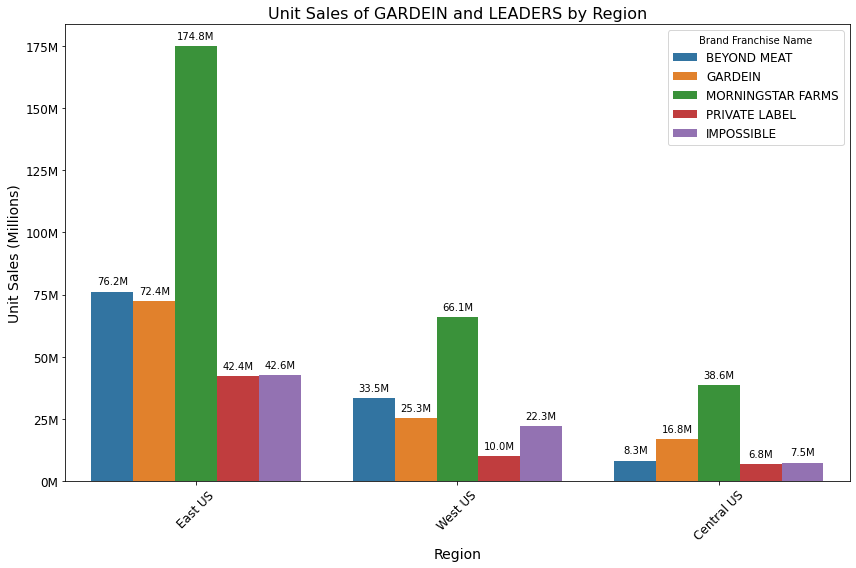

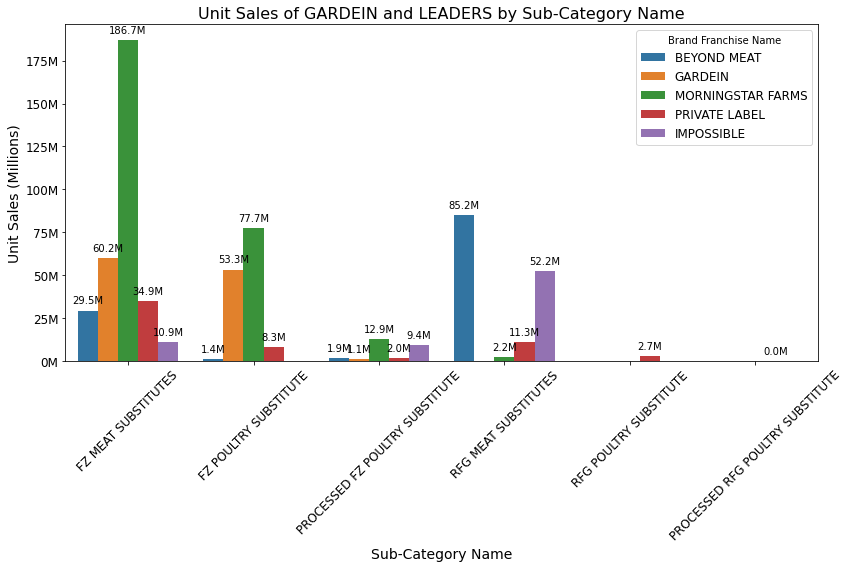

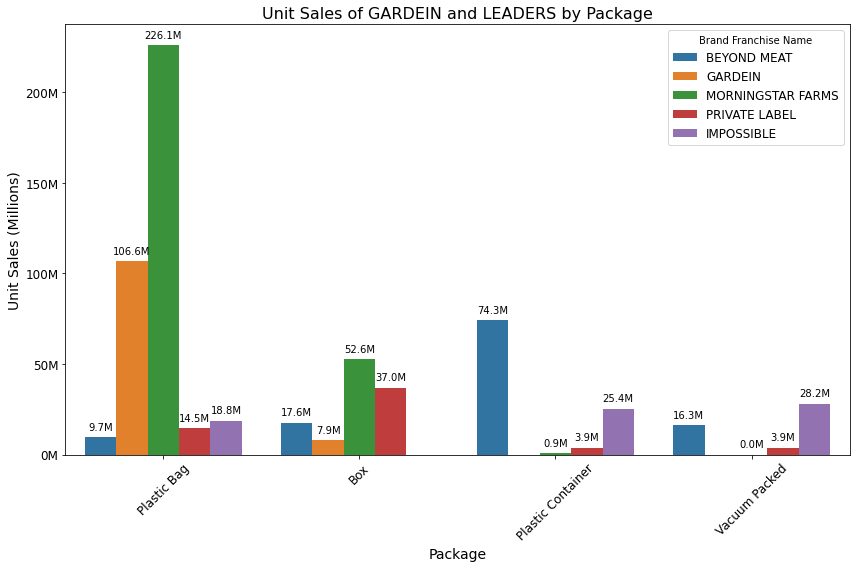

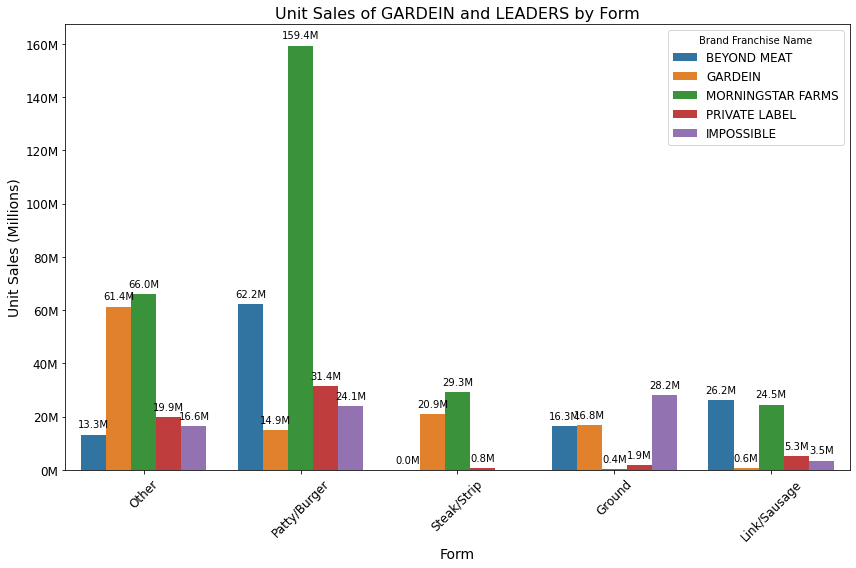

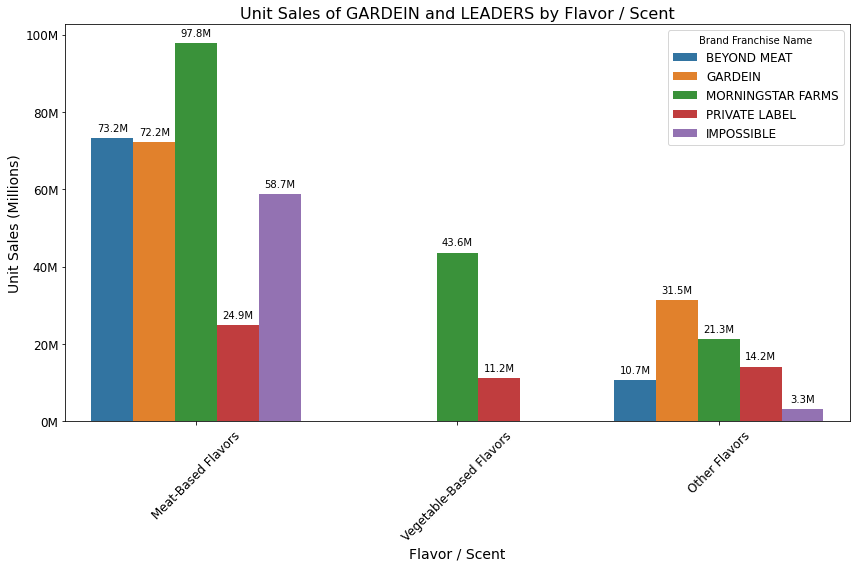

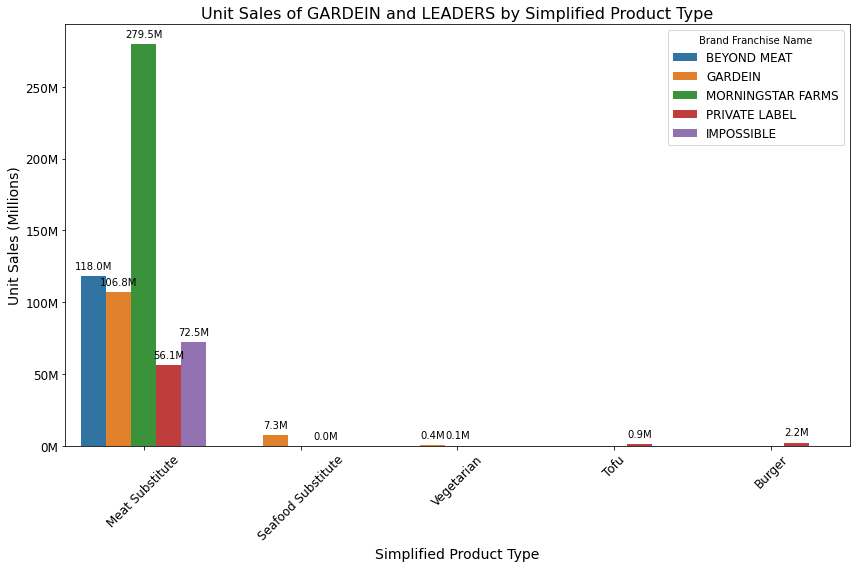

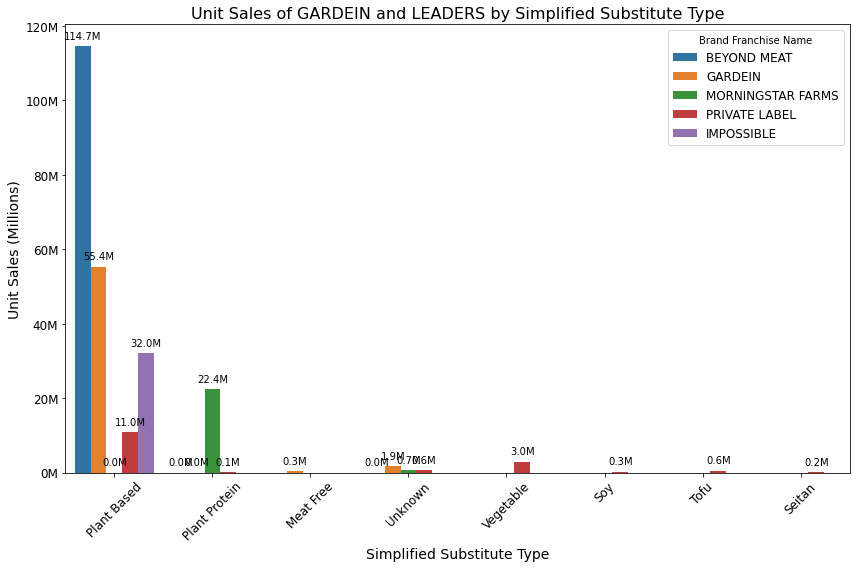

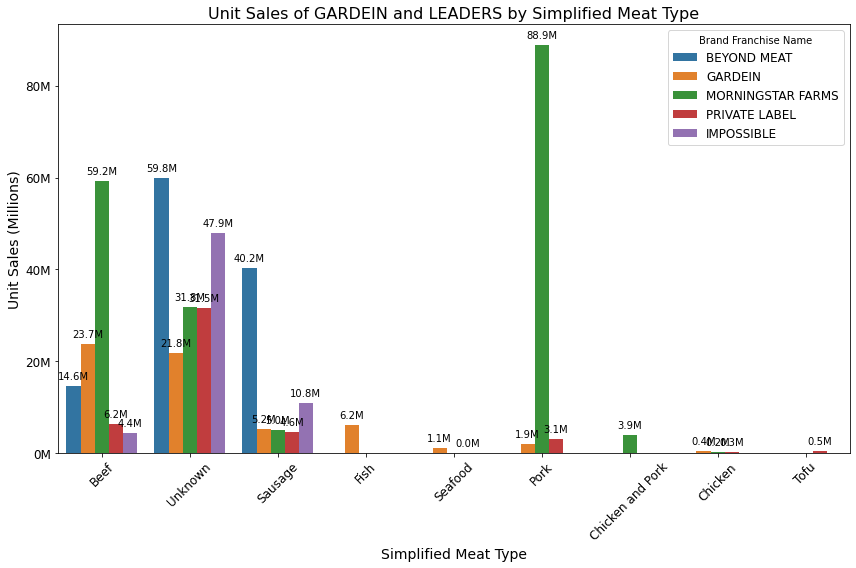

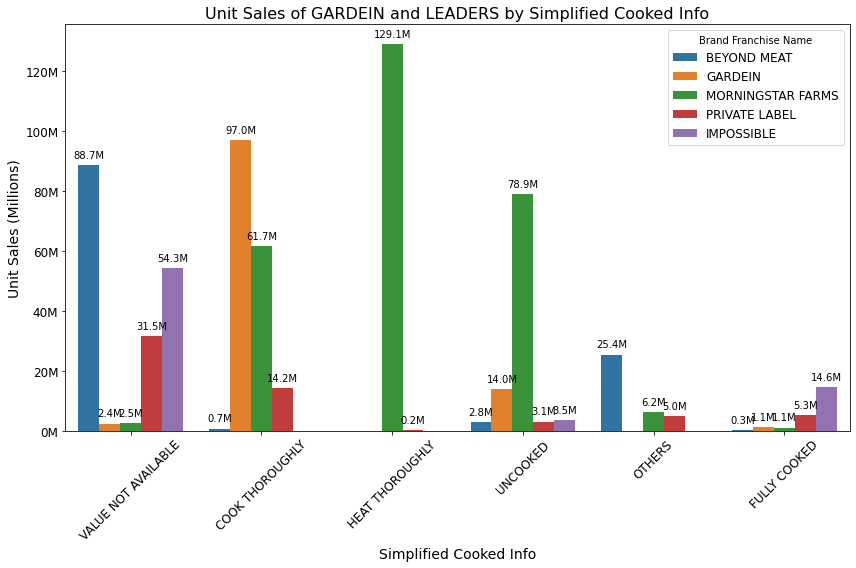

In [22]:
# Plotting
for variable in categorical_variables_to_plot:
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    ax = sns.barplot(x=variable, y='Unit Sales', hue='Brand Franchise Name', data=df_merge2, ci=None, estimator=sum)  # Set ci=None to disable error bars
    
    # Scale the y-axis to millions
    ax.set_yticklabels(['{:.0f}M'.format(y/1_000_000) for y in ax.get_yticks()])
    
    plt.title(f'Unit Sales of GARDEIN and LEADERS by {variable}', fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Unit Sales (Millions)', fontsize=14)  # Update y-axis label
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Brand Franchise Name', fontsize=12,loc='upper right', bbox_to_anchor=(1, 1))
    
    # Add value annotations on top of each bar
    for p in ax.patches:
        ax.annotate('{:.1f}M'.format(p.get_height()/1_000_000), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                    fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [23]:
# Fill NaN values with 0 in numerical columns
df_merge1.fillna(0, inplace=True)

## Modelling Trials


In [ ]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = df_merge1['Price per Volume Display Only']  # Independent variable
y = df_merge1['Unit Sales']  # Dependent variable

# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

In [ ]:
import statsmodels.api as sm

# Define the predictors and the dependent variable
X = df_merge1[['Price per Volume Display Only', 'Volume Sales Display Only', 'Dollar Sales Display Only']]
y = df_merge1['Unit Sales']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

In [ ]:
from scipy.stats import f_oneway

# Columns to test
columns_to_test = ['Simplified Product Type', 'Simplified Meat Type', 'Simplified Cooked Info', 
                   'Simplified Substitute Type', 'Brand Category', 'Sub-Category Name', 
                   'Package', 'Form', 'Region', 'Flavor / Scent']

# Perform F-tests for each column
for column in columns_to_test:
    # Extract data for each level of the column
    groups = []
    for level in df_merge1[column].unique():
        group = df_merge1[df_merge1[column] == level]['Unit Sales']
        groups.append(group)
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Print results
    print(f"Column: {column}")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)
    print()

In [ ]:
import statsmodels.api as sm

# Selecting numerical columns
numerical_columns = df_merge1.select_dtypes(include=['float64', 'int64']).columns

# Dropping 'Unit Sales' from numerical columns
numerical_columns = numerical_columns.drop('Unit Sales')

# Loop through numerical columns and fit linear regression model
for column in numerical_columns:
    X = sm.add_constant(df_merge1[column])  # Adding constant
    y = df_merge1['Unit Sales']
    model = sm.OLS(y, X).fit()  # Fitting OLS model
    print(f"Column: {column}")
    print(model.summary())
    print("\n")

In [ ]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = df_merge1['UPC 13 digit']  # Independent variable
y = df_merge1['Unit Sales']  # Dependent variable

# Add constant term to independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

In [ ]:
import statsmodels.api as sm

# Selecting Volume Sales related columns
volume_sales_columns = [col for col in df_merge1.columns if 'Volume Sales' in col]

# Creating the design matrix X and target variable y
X = df_merge1[volume_sales_columns]
X = sm.add_constant(X)  # Add a constant term to the model
y = df_merge1['Unit Sales']

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of regression results
print(results.summary())

In [ ]:
import statsmodels.api as sm

# Selecting Volume Sales related columns
volume_sales_columns = [col for col in df_merge1.columns if 'Dollar Sales' in col]

# Creating the design matrix X and target variable y
X = df_merge1[volume_sales_columns]
X = sm.add_constant(X)  # Add a constant term to the model
y = df_merge1['Unit Sales']

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of regression results
print(results.summary())

In [ ]:
import statsmodels.api as sm

# Selecting Volume Sales related columns
volume_sales_columns = [col for col in df_merge1.columns if 'Price per Unit' in col]

# Creating the design matrix X and target variable y
X = df_merge1[volume_sales_columns]
X = sm.add_constant(X)  # Add a constant term to the model
y = df_merge1['Unit Sales']

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of regression results
print(results.summary())

In [ ]:
import statsmodels.api as sm

# Selecting Volume Sales related columns
volume_sales_columns = [col for col in df_merge1.columns if 'Incremental' in col]

# Creating the design matrix X and target variable y
X = df_merge1[volume_sales_columns]
X = sm.add_constant(X)  # Add a constant term to the model
y = df_merge1['Unit Sales']

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of regression results
print(results.summary())

In [ ]:
import statsmodels.api as sm

# Selecting Volume Sales related columns
volume_sales_columns = [col for col in df_merge1.columns if 'ACV' in col]

# Creating the design matrix X and target variable y
X = df_merge1[volume_sales_columns]
X = sm.add_constant(X)  # Add a constant term to the model
y = df_merge1['Unit Sales']

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of regression results
print(results.summary())

## EDA continue

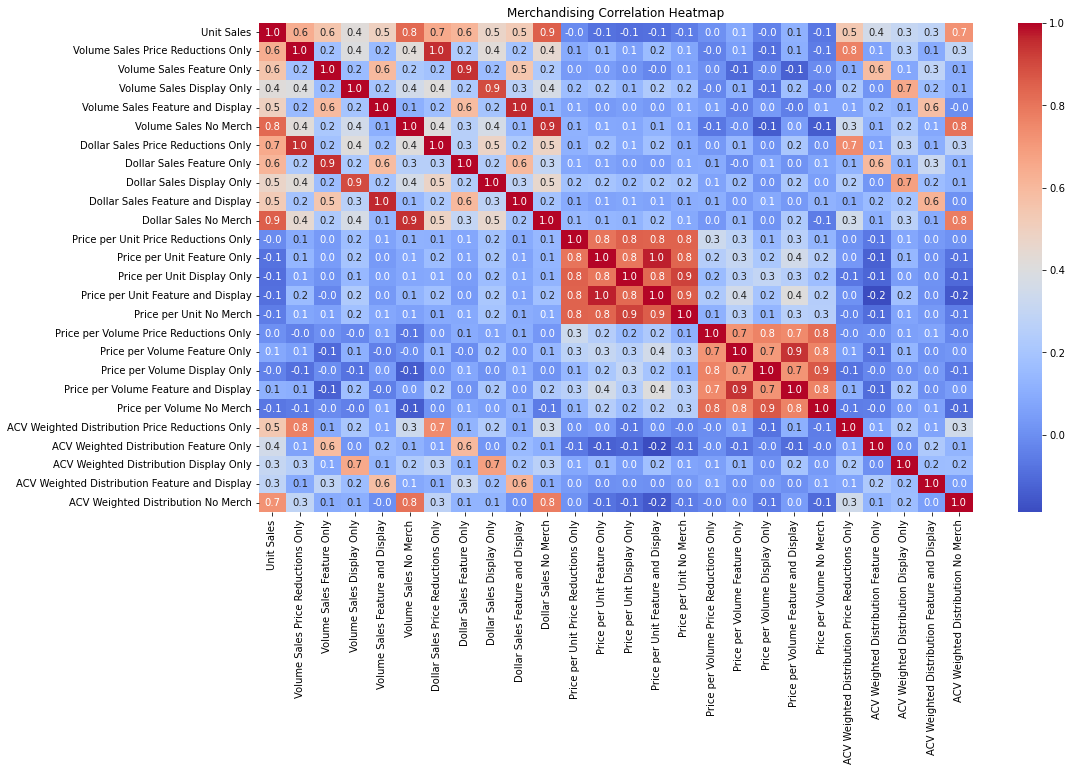

In [24]:
# Correlation Analysis

var = ['Unit Sales',
       'Volume Sales Price Reductions Only', 'Volume Sales Feature Only', 'Volume Sales Display Only',
       'Volume Sales Feature and Display', 'Volume Sales No Merch',
       'Dollar Sales Price Reductions Only', 'Dollar Sales Feature Only', 'Dollar Sales Display Only',
       'Dollar Sales Feature and Display', 'Dollar Sales No Merch',
       'Price per Unit Price Reductions Only', 'Price per Unit Feature Only', 'Price per Unit Display Only', 
       'Price per Unit Feature and Display', 'Price per Unit No Merch',
       'Price per Volume Price Reductions Only', 'Price per Volume Feature Only', 'Price per Volume Display Only', 
       'Price per Volume Feature and Display', 'Price per Volume No Merch',
       'ACV Weighted Distribution Price Reductions Only', 'ACV Weighted Distribution Feature Only', 'ACV Weighted Distribution Display Only',
       'ACV Weighted Distribution Feature and Display', 'ACV Weighted Distribution No Merch']

my_corr_matrix = df_merge[var].corr()

# Plot the heatmap with correlation coefficients
plt.figure(figsize=(16, 9))
sns.heatmap(my_corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Merchandising Correlation Heatmap')
plt.show()

In [25]:
df_merge.columns

Index(['Region', 'Time', 'Product_x', 'UPC 13 digit', 'Unit Sales',
       'Unit Sales No Merch', 'Unit Sales Any Merch',
       'Unit Sales Price Reductions Only', 'Unit Sales Feature Only',
       'Unit Sales Display Only', 'Unit Sales Special Pack Only',
       'Unit Sales Feature and Display', 'Volume Sales',
       'Volume Sales No Merch', 'Volume Sales Any Merch',
       'Volume Sales Price Reductions Only', 'Volume Sales Feature Only',
       'Volume Sales Display Only', 'Volume Sales Special Pack Only',
       'Volume Sales Feature and Display', 'Dollar Sales',
       'Dollar Sales No Merch', 'Dollar Sales Any Merch',
       'Dollar Sales Price Reductions Only', 'Dollar Sales Feature Only',
       'Dollar Sales Display Only', 'Dollar Sales Special Pack Only',
       'Dollar Sales Feature and Display', 'Price per Unit',
       'Price per Unit No Merch', 'Price per Unit Any Merch',
       'Price per Unit Price Reductions Only', 'Price per Unit Feature Only',
       'Price per Uni

* Columns not to include in modelling after correlation analysis:

- Unit sales all components
- Volume Sales and all components except volume sales no merch, Dollar Sales, Price per Unit all components, Price per Volume      all components, ACV Weighted Distribution

In [26]:
# Rename columns
df_merge1 = df_merge1.rename(columns={'Package': 'Simplified Package', 'Form': 'Simplified Form', 'Flavor / Scent': 'Simplified Flavor/Scent'})

In [27]:
# List of columns to drop
columns_to_drop = ['Product Type', 'Type Of Meat Substituted', 'Type Of Substitute', 'Cooked Info']

# Drop the columns
df_merge1 = df_merge1.drop(columns=columns_to_drop)

In [28]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824367 entries, 52 to 991779
Data columns (total 55 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   Region                                           824367 non-null  object        
 1   Time                                             824367 non-null  datetime64[ns]
 2   Product_x                                        824367 non-null  object        
 3   UPC 13 digit                                     824367 non-null  float64       
 4   Unit Sales                                       824367 non-null  float64       
 5   Unit Sales No Merch                              824367 non-null  float64       
 6   Unit Sales Price Reductions Only                 824367 non-null  float64       
 7   Unit Sales Feature Only                          824367 non-null  float64       
 8   Unit Sales Display Only

In [29]:
categorical_columns = ['Region','Sub-Category Name', 'Brand Category', 'Simplified Package', 
                       'Simplified Form', 'Simplified Flavor/Scent', 'Brand Category', 
                       'Simplified Product Type', 'Simplified Meat Type', 
                       'Simplified Substitute Type', 'Simplified Cooked Info']

for i in categorical_columns:
    unique = df_merge1[i].unique()
    print(i)
    print(unique)
    print()

Region
['East US' 'Central US' 'West US']

Sub-Category Name
['FZ MEAT SUBSTITUTES' 'FZ POULTRY SUBSTITUTE'
 'PROCESSED FZ POULTRY SUBSTITUTE' 'PROCESSED RFG POULTRY SUBSTITUTE'
 'RFG MEAT SUBSTITUTES' 'RFG POULTRY SUBSTITUTE']

Brand Category
['OTHERS' 'LEADERS' 'GARDEIN']

Simplified Package
['Plastic Bag' 'Vacuum Packed' 'Box' 'Plastic Container' 'Other']

Simplified Form
['Ground' 'Other' 'Patty/Burger' 'Link/Sausage' 'Steak/Strip']

Simplified Flavor/Scent
['Meat-Based Flavors' 'Vegetable-Based Flavors' 0 'Other Flavors']

Brand Category
['OTHERS' 'LEADERS' 'GARDEIN']

Simplified Product Type
['Meat Substitute' 'Seafood Substitute' 'Vegetarian' 'Tofu' 'Burger']

Simplified Meat Type
['Beef' 'Sausage' 'Unknown' 'Pork' 'Fish' 'Seafood' 'Chicken and Pork'
 'Chicken' 0 'Tofu']

Simplified Substitute Type
['Plant Protein' 'Plant Based' 0 'Vegetable and Grains' 'Vegetable'
 'Unknown' 'Meat Free' 'Vegetarian' 'Soy' 'Tofu' 'Nut' 'Seitan' 'Tempeh'
 'Chickpea']

Simplified Cooked Info
['VAL

In [30]:
# Define the list of columns where you want to replace 0 with 'unknown'
numeric_columns = ['Simplified Flavor/Scent','Simplified Meat Type','Simplified Substitute Type']

# Replace 0 with 'unknown' in the specified columns
df_merge1[numeric_columns] = df_merge1[numeric_columns].replace(0, 'Unknown')


In [31]:
# Replace 'Unknown' with 'Others' in the 'Simplified Flavor/Scent' column
df_merge1['Simplified Flavor/Scent'] = df_merge1['Simplified Flavor/Scent'].replace('Unknown', 'Others')
df_merge1['Simplified Flavor/Scent'] = df_merge1['Simplified Flavor/Scent'].replace('Other Flavors', 'Others')

In [32]:
# List of columns to replace 'Unknown' with 'Others'
columns_to_replace = ['Simplified Substitute Type', 'Simplified Meat Type']

# Loop through each column and replace 'Unknown' with 'Others'
for column in columns_to_replace:
    df_merge1[column] = df_merge1[column].replace('Unknown', 'Others')


In [33]:
df_merge1['Simplified Cooked Info'] = df_merge1['Simplified Cooked Info'].replace('VALUE NOT AVAILABLE', 'Others')
# List of columns to replace 'Unknown' with 'Others'
columns_to_replace = ['Brand Category', 'Simplified Cooked Info']

# Loop through each column and replace 'Unknown' with 'Others'
for column in columns_to_replace:
    df_merge1[column] = df_merge1[column].replace('OTHERS', 'Others')


In [34]:
# List of columns to replace 'Unknown' with 'Others'
columns_to_replace = ['Simplified Package', 'Simplified Form']

# Loop through each column and replace 'Unknown' with 'Others'
for column in columns_to_replace:
    df_merge1[column] = df_merge1[column].replace('Other', 'Others')


In [35]:
categorical_columns = ['Region','Sub-Category Name', 'Brand Category', 'Simplified Package', 
                       'Simplified Form', 'Simplified Flavor/Scent', 'Brand Category', 
                       'Simplified Product Type', 'Simplified Meat Type', 
                       'Simplified Substitute Type', 'Simplified Cooked Info']

for i in categorical_columns:
    unique = df_merge1[i].nunique()
    print(i)
    print(unique)

Region
3
Sub-Category Name
6
Brand Category
3
Simplified Package
5
Simplified Form
5
Simplified Flavor/Scent
3
Brand Category
3
Simplified Product Type
5
Simplified Meat Type
9
Simplified Substitute Type
13
Simplified Cooked Info
5


# ENCODING


In [39]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define the list of categorical columns
categorical_columns = ['Region','Sub-Category Name','Brand Category', 'Simplified Package', 
                       'Simplified Form', 'Simplified Flavor/Scent', 
                       'Simplified Product Type', 'Simplified Meat Type', 
                       'Simplified Substitute Type', 'Simplified Cooked Info']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(df_merge1[categorical_columns])

# Get the feature names from OneHotEncoder
feature_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=df_merge1.index)

# Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([df_merge1, encoded_df], axis=1)

# Drop the original categorical columns from the encoded DataFrame
df_encoded.drop(columns=categorical_columns, inplace=True)

In [42]:
encoded_df.shape

(824367, 57)

In [43]:
df_encoded.shape

(824367, 102)

In [ ]:
df_merge1.head(2)

In [ ]:
# Check for missing values in the original categorical columns
missing_values = df_merge1[categorical_columns].isnull().sum()
print("Missing values in original categorical columns:")
print(missing_values)


In [ ]:
# Check for duplicate rows in the original DataFrame
duplicate_rows = df_merge1.duplicated().sum()
print("Duplicate rows in the original DataFrame:", duplicate_rows)
print('------------------')
# Get the shape of the DataFrame before encoding
original_shape = df_merge1.shape

# Get the shape of the DataFrame after encoding
encoded_shape = df_encoded.shape

# Calculate the difference to find the number of rows added due to encoding
rows_added = encoded_shape[0] - original_shape[0]

# Display the number of unknown categories handled by the encoder
print("Number of unknown categories handled by the encoder (rows added during encoding):", rows_added)

print('------------------')
# Display the categories handled by the encoder for each column
for i, column in enumerate(categorical_columns):
    print(f"Categories handled by the encoder for column '{column}':")
    print(encoder.categories_[i])
    print()


In [ ]:
df_encoded3['Time']

In [ ]:
# Select columns of object type
object_columns = encoded_df3.select_dtypes(include='int64')

# Print the object type columns
print("Object type columns:")
print(object_columns.columns.tolist())


In [ ]:
import pandas as pd

# Set the maximum number of columns to display to a large number


# Print the DataFrame info again
df_encoded.info()


In [ ]:
df_encoded3.info()

In [ ]:
df_merge1.info()